In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import itertools
import plotly.offline as py
from plotly import tools
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode , iplot , plot
init_notebook_mode(connected = True)
import cufflinks as cf
cf.go_offline()
import itertools
import plotly.offline as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly import tools
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV , cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, precision_recall_curve
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import classification_report , accuracy_score , roc_auc_score
from sklearn import (metrics, linear_model, preprocessing)

from function import *

import warnings
warnings.filterwarnings("ignore")

# <a id = '7'>Load Data<a/>


In [2]:
df = pd.read_csv('Cleaned_data.csv')
df.head()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
0,1,20000,24,0,0,0,0,0,0,3913,...,0,0,0,0,1,0,1,0,0,1
1,2,120000,26,0,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,1,0,0,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,0,0,1
4,5,50000,57,0,0,0,0,0,0,8617,...,10000,9000,689,679,0,0,1,0,1,1


In [10]:
print("Data has : rows:{} cols:{}".format(df.shape[0], df.shape[1]))

Data has : rows:30000 cols:27


# <a id = '7'>Rename Male to Gender , 1 for Male and 0 for Female<a/>


In [3]:
df.rename(columns = {'male':'gender'} , inplace = True)

In [4]:
df.columns

Index(['id', 'limit_bal', 'age', 'pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5',
       'pay_6', 'bill_amt1', 'bill_amt2', 'bill_amt3', 'bill_amt4',
       'bill_amt5', 'bill_amt6', 'pay_amt1', 'pay_amt2', 'pay_amt3',
       'pay_amt4', 'pay_amt5', 'pay_amt6', 'default', 'grad_school',
       'university', 'high_school', 'gender', 'married'],
      dtype='object')

In [7]:
df.head()

,id,limit_bal,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,...,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default,grad_school,university,high_school,male,married
0,1,20000,24,0,0,0,0,0,0,3913,...,0,0,0,0,1,0,1,0,0,1
1,2,120000,26,0,2,0,0,0,2,2682,...,1000,1000,0,2000,1,0,1,0,0,0
2,3,90000,34,0,0,0,0,0,0,29239,...,1000,1000,1000,5000,0,0,1,0,0,0
3,4,50000,37,0,0,0,0,0,0,46990,...,1200,1100,1069,1000,0,0,1,0,0,1
4,5,50000,57,0,0,0,0,0,0,8617,...,10000,9000,689,679,0,0,1,0,1,1


# <a id = '7'>Building Models using all features<a/>


In [5]:
target = 'default'
X = df.drop('default' , 1)
robust_scaler = RobustScaler()
X = robust_scaler.fit_transform(X)
y = df[target]

In [ ]:
# Train test split

In [6]:
X_train , x_test , y_train , y_test = train_test_split(X , y , test_size=0.2 , random_state = 123 
                                                       , stratify = y)

In [7]:
def CMatrix(CM, labels=['pay','default']):
    df = pd.DataFrame(data=CM, index=labels, columns=labels)
    df.index.name='TRUE'
    df.columns.name='PREDICTION'
    df.loc['Total'] = df.sum()
    df['Total'] = df.sum(axis=1)
    return df

#  Base function

In [11]:
def base_func(element):
    #train and fit the model
    model = element()
    model.fit(X_train , y_train)
    
    #predict
    train_preds = model.predict(X_train)
    test_preds = model.predict(x_test)
    
    #evaluation
    train_accuracy = roc_auc_score(y_train , train_preds)
    test_accuracy = roc_auc_score(y_test , test_preds)
    
    print(str(element))
    print("--------------------------------------------")
    print(f"Training Accuracy: {(train_accuracy * 100) :.4}%")
    print(f"Test Accuracy : {(test_accuracy * 100) :.4}%")
    
    #Store accuracy in a new DataFrame
    score_logreg = [element , train_accuracy , test_accuracy]
    print("------------------------------------------------")
    models = pd.DataFrame([score_logreg])

# Run 4 Models To find best Accuracies

In [12]:
algorithms = [RandomForestClassifier, LogisticRegression , DecisionTreeClassifier , GaussianNB]

for element in algorithms:
    base_func(element)

<class 'sklearn.ensemble._forest.RandomForestClassifier'>
--------------------------------------------
Training Accuracy: 99.99%
Test Accuracy : 59.25%
------------------------------------------------
<class 'sklearn.linear_model._logistic.LogisticRegression'>
--------------------------------------------
Training Accuracy: 58.09%
Test Accuracy : 57.84%
------------------------------------------------
<class 'sklearn.tree._classes.DecisionTreeClassifier'>
--------------------------------------------
Training Accuracy: 100.0%
Test Accuracy : 58.3%
------------------------------------------------
<class 'sklearn.naive_bayes.GaussianNB'>
--------------------------------------------
Training Accuracy: 59.08%
Test Accuracy : 58.85%
------------------------------------------------


# Observation :
- Logistic regression and Naive bayes models performed very well on both the training and test data

# Preparing Data for model analysis

In [25]:
# Data frame for evaluation metrics
metrics = pd.DataFrame(index=['accuracy', 'precision', 'recall'], 
                      columns=['NULL','LogisticReg', 'ClassTree', 'NaiveBayes'])

# <a id = '7'>Explanation of Our Performance metrics<a/>

There are few values given in this report / each category in the target (`Default` or `No Default`):

* **Precision**  
* **Recall**  
* **F1-score**  

Let's explain each of them:

* **Precision** identifies the frequency with which a model was correct when predicting the positive class. That is:

$$Precision = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Positives}}$$

* **Recall** answers the following question: Out of all the possible positive labels, how many did the model correctly identify? That is:

$$Recall = \frac{\textrm{True Positives}}{\textrm{True Positives} + \textrm{False Negatives}}$$

* **F1-score** is the harmonic mean of **precision** and **recall**.

$$\textrm{F1-score} = 2  \frac{Precision * Recall}{Precision + Recall}$$


Precison is better for the `Not Default` as well as Recall and F1-score.

Let's also show the confusion matrix.

# The Null Model - note it always predicts the most common category

In [26]:
y_pred_test = np.repeat(y_train.value_counts().idxmax(), y_test.size)
metrics.loc['accuracy','NULL'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NULL'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NULL'] = recall_score(y_pred=y_pred_test, y_true=y_test)

CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,4673,0,4673
default,1327,0,1327
Total,6000,0,6000


# <a id = '7'>Logistic Regression<a/>

In [15]:
logReg = LogisticRegression(n_jobs=-1 , random_state = 15)
logReg.fit(X_train , y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2', random_state=15,
                   solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [ ]:
# Evaluating the Model

In [27]:
y_pred_test = logReg.predict(x_test)
metrics.loc['accuracy','LogisticReg'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','LogisticReg'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','LogisticReg'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,4578,95,4673
default,1092,235,1327
Total,5670,330,6000


# <a id = '7'>Decision Tree Classifier<a/>


In [28]:
# 2. Create an instance of the estimator
class_tree = DecisionTreeClassifier(min_samples_split=30, min_samples_leaf=10, random_state=10)

# 3. Use the trainning data to train the estimator
class_tree.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = class_tree.predict(x_test)
metrics.loc['accuracy','ClassTree'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','ClassTree'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','ClassTree'] = recall_score(y_pred=y_pred_test, y_true=y_test)
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,4133,540,4673
default,893,434,1327
Total,5026,974,6000


# <a id = '7'>Naive Bayes Classifier<a/>

In [29]:
# 2. Create an instance of the estimator
NBC = GaussianNB()

# 3. Use the trainning data to train the estimator
NBC.fit(X_train, y_train)

# 4. Evaluate the model
y_pred_test = NBC.predict(x_test)
metrics.loc['accuracy','NaiveBayes'] = accuracy_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['precision','NaiveBayes'] = precision_score(y_pred=y_pred_test, y_true=y_test)
metrics.loc['recall','NaiveBayes'] = recall_score(y_pred=y_pred_test, y_true=y_test)

#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
CMatrix(CM)

PREDICTION,pay,default,Total
TRUE,,,
pay,4412,261,4673
default,1018,309,1327
Total,5430,570,6000


# <a id = '7'>Checking the Perfomance of the Models<a/>

In [30]:
100*metrics

,NULL,LogisticReg,ClassTree,NaiveBayes
accuracy,77.8833,80.2167,76.1167,78.6833
precision,0,71.2121,44.5585,54.2105
recall,0,17.7091,32.7054,23.2856


# <a id = '7'>Plotting the Performance of the models<a/>

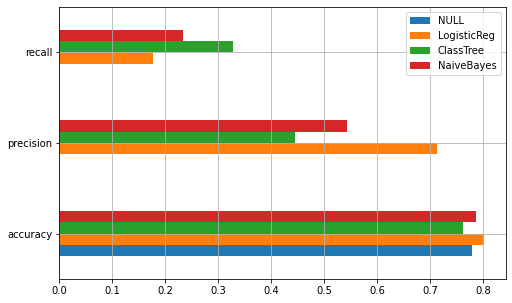

In [31]:
fig,  ax = plt.subplots(figsize=(8,5))
metrics.plot(kind='barh' , ax=ax)
ax.grid()

# <a id = '7'>Precision Recall Curve For Logistic Regression Model And Naive Bayes Model<a/>

In [34]:
precision_nb, recall_nb, thresholds_nb = precision_recall_curve(y_true=y_test, 
                                                                probas_pred=NBC.predict_proba(x_test)[:,1])
precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_true=y_test, 
                                                                probas_pred=logReg.predict_proba(x_test)[:,1])

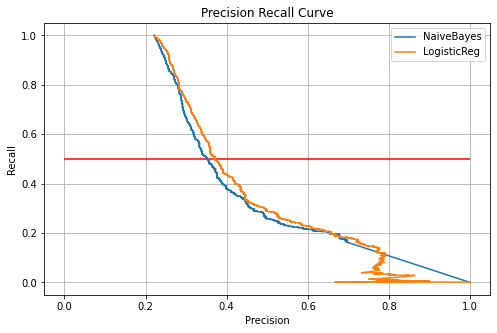

In [35]:
fig , ax = plt.subplots(figsize=(8,5))
ax.plot(precision_nb , recall_nb , label = 'NaiveBayes')
ax.plot(precision_lr , recall_lr , label = 'LogisticReg')
ax.set_xlabel("Precision")
ax.set_ylabel("Recall")
ax.set_title("Precision Recall Curve")
ax.hlines(y=0.5, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid()

# <a id = '7'>Threshold Selection<a/>

# <a id = '7'>Confusion matrix for modified Logistic Regression Classifier<a/>

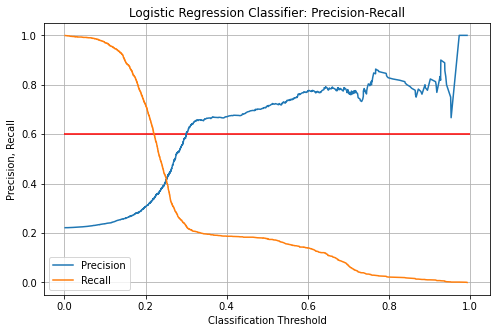

In [36]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(thresholds_lr, precision_lr[1:], label='Precision')
ax.plot(thresholds_lr, recall_lr[1:], label='Recall')
ax.set_xlabel('Classification Threshold')
ax.set_ylabel('Precision, Recall')
ax.set_title('Logistic Regression Classifier: Precision-Recall')
ax.hlines(y=0.6, xmin=0, xmax=1, color='red')
ax.legend()
ax.grid();

# <a id = '7'>Classifeir with threshold of 0.2<a/>
    
- Note from here i adjusted the thresholds a bit and ended up choosing 0.2 . 
- Note i got much better Precision and recall when i chose 0.23    

In [45]:
y_pred_proba = logReg.predict_proba(x_test)[:,1]
y_pred_test = (y_pred_proba >= 0.20).astype('int')
#Confusion matrix
CM = confusion_matrix(y_pred=y_pred_test, y_true=y_test)
print("Recall: ", 100*recall_score(y_pred=y_pred_test, y_true=y_test))
print("Precision: ", 100*precision_score(y_pred=y_pred_test, y_true=y_test))
CMatrix(CM)

Recall:  71.8914845516202
Precision:  30.655526992287918


PREDICTION,pay,default,Total
TRUE,,,
pay,2515,2158,4673
default,373,954,1327
Total,2888,3112,6000


# Observation :
- You can select the best threshold for the model 

In [ ]:
# <a id = '7'><a/>

In [ ]:
# <a id = '7'>Plotting the Performance of the models<a/>

In [ ]:
# <a id = '7'>Plotting the Performance of the models<a/>

In [ ]:
# <a id = '7'>Plotting the Performance of the models<a/>

In [ ]:
# <a id = '7'>Plotting the Performance of the models<a/>